In [5]:
## Imports
from huggingface_hub import hf_hub_download
from llama_cpp import Llama


In [6]:
## Download the GGUF model
model_name = "LoneStriker/BioMistral-7B-DARE-GGUF"
model_file = "BioMistral-7B-DARE-Q4_K_M.gguf" # this is the specific model file we'll use in this example. It's a 4-bit quant, but other levels of quantization are available in the model repo if preferred
model_path = hf_hub_download(model_name, filename=model_file, local_dir="/mnt/extproj/projekte/regulatory_networks/llm_addon/model/")


In [7]:
# GLOBAL VARIABLES
my_model_path = "./model/BioMistral-7B-DARE-Q4_K_M.gguf"
#my_model_path = "./model/ggml-model-Q6_K.gguf"
#my_model_path = "./model/llama3-openbiollm-8b.Q6_K.gguf"
CONTEXT_SIZE = 512


# LOAD THE MODEL
llm = Llama(
    model_path=my_model_path,
    n_ctx=2048,  # Context length to use
    n_threads=1,            # Number of CPU threads to use
    n_gpu_layers=0,        # Number of model layers to offload to GPU
)


llama_model_loader: loaded meta data with 23 key-value pairs and 291 tensors from ./model/BioMistral-7B-DARE-Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = models
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count 

In [10]:
## Generation kwargs
generation_kwargs = {
    "max_tokens":-1,
    "stop":["</s>"],
    "echo":False, # Echo the prompt in the output
    "top_k":1, # This is essentially greedy decoding, since the model will always return the highest-probability token. Set this value > 1 for sampling decoding
    "temperature": 0.9
}

## Run inference
geneList = ("myocaridal infarction fibroblasts", ["AOX1"," ADH1B"," ACOX1"," MDH1"," ABAT"," INMT"," HIBADH"," ALDH3A2"," MOCOS"," SCP2"," ACSF3"," ACOX3"," TECR"," ALDH6A1"," MLYCD"," DBT"," CD38"," ZNF236"," AASS"," GCDH"," CAT"," PC"," RDH11"," BST1"," MAOA"," PCCB"," MOCS1"," RDH5"," ACSS2"," HLCS"," DHRS4"," NNMT"," PHYKPL"," ECHDC1"," CROT"," ACSS1"," PCCA"," CPT1C"," ECH1"," SIRT7"," CPT1A"," ACAT1"," PDXK"," CPT1B"," DHRS3"," HNMT"," SIRT5"," ASL"," MOCS2"," ACACB"," ADH5"," DHTKD1"," AKAP12"," MAOB"," EHHADH"," ME2"," MAP4K5"," SUCLG1"," ALDH2"," ALDH1A1"," BTD"," ACADS"," ALDH7A1"," DLST"," SIRT3"," AGMO"," ACSS3"," PDE7A"," HACL1"," MCCC1"])
#geneList = ("kidney", ['NOG', 'LHCGR', 'DIO2', 'NPR1', 'SLC8A1', 'NR2F1', 'EGFL7', 'JARID2', 'HJV', 'PLOD1', 'SHOX2', 'ADRB3', 'TBX3', 'ATP11B', 'COX6C', 'BMPR1A', 'APOC3', 'CALR', 'ATF2', 'TPO', 'FGF10', 'NCOR2', 'RBM19', 'LMBR1L', 'TRMT1', 'FOXH1', 'ELSPBP1', 'TBX18', 'ME3', 'RGMB', 'LEMD3', 'ACOT11', 'PCP2', 'TBX6', 'TBX20', 'RGMA', 'ANK2', 'BMP5', 'GATA5', 'ZFYVE16', 'SCGB1A1', 'SMAD9', 'SLC47A1', 'NOS3', 'HIPK1', 'SUMO1', 'DRAP1', 'BMP2', 'BMPR2', 'CHRDL1', 'TBX1', 'LYL1', 'NKX2-5', 'APOA2', 'GJA5', 'APOA4', 'SLC5A5', 'HMGA2', 'ACTA2', 'HIPK2', 'DHX9', 'CHRD', 'MOV10L1', 'ACVRL1', 'PKD1', 'HFE', 'TBX5', 'CCDC89', 'SERPINB3', 'PRKD3', 'SIRT1', 'PLA2G1B', 'ETV2', 'mir-513a', 'SRA1', 'mir-320a', 'mir-1', 'mir-214', 'mir-223', 'mir-185', 'mir-125b', 'mir-155', 'mir-137', 'mir-206', 'mir-4271', 'mir-122', 'mir-647', 'mir-335', 'mir-543', 'mir-19b', 'mir-92a', 'mir-106a', 'mir-96', 'mir-143', 'mir-145', 'mir-17', 'mir-18a', 'mir-19a', 'mir-20a', 'mir-21', 'mir-141', 'mir-181a', 'mir-27a', 'mir-200a', 'mir-200b'])

genePrompt = "The following genes are dysregulated in {}: {}. How are these genes connected and which molecular functions are altered?".format(geneList[0],", ".join(geneList[1]))

prompt = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: {}

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:
""".format(genePrompt)

print(prompt)

res = llm(prompt, **generation_kwargs) # Res is a dictionary

## Unpack and the generated text from the LLM response dictionary and print it
print(res["choices"][0]["text"])

Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in myocaridal infarction fibroblasts: AOX1,  ADH1B,  ACOX1,  MDH1,  ABAT,  INMT,  HIBADH,  ALDH3A2,  MOCOS,  SCP2,  ACSF3,  ACOX3,  TECR,  ALDH6A1,  MLYCD,  DBT,  CD38,  ZNF236,  AASS,  GCDH,  CAT,  PC,  RDH11,  BST1,  MAOA,  PCCB,  MOCS1,  RDH5,  ACSS2,  HLCS,  DHRS4,  NNMT,  PHYKPL,  ECHDC1,  CROT,  ACSS1,  PCCA,  CPT1C,  ECH1,  SIRT7,  CPT1A,  ACAT1,  PDXK,  CPT1B,  DHRS3,  HNMT,  SIRT5,  ASL,  MOCS2,  ACACB,  ADH5,  DHTKD1,  AKAP12,  MAOB,  EHHADH,  ME2,  MAP4K5,  SUCLG1,  ALDH2,  ALDH1A1,  BTD,  ACADS,  ALDH7A1,  DLST,  SIRT3,  AGMO,  ACSS3,  PDE7A,  HACL1,  MCCC1. How are these genes connected and which molecular functions are altered?

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful ans

Llama.generate: prefix-match hit

llama_print_timings:        load time =    7876.11 ms
llama_print_timings:      sample time =      45.47 ms /   108 runs   (    0.42 ms per token,  2375.40 tokens per second)
llama_print_timings: prompt eval time =    6397.51 ms /   447 tokens (   14.31 ms per token,    69.87 tokens per second)
llama_print_timings:        eval time =   86750.72 ms /   107 runs   (  810.75 ms per token,     1.23 tokens per second)
llama_print_timings:       total time =   93257.33 ms /   554 tokens


The dysregulated genes in myocardial infarction fibroblasts are involved in various metabolic pathways such as fatty acid oxidation, alcohol metabolism, amino acid metabolism, and energy production. These genes are also involved in the regulation of cellular processes such as apoptosis, inflammation, and oxidative stress. The dysregulation of these genes may lead to the development of cardiac fibrosis, which is a major contributor to heart failure.


In [12]:
## Generation kwargs
generation_kwargs = {
    "max_tokens":-1,
    "stop":["</s>"],
    "echo":False, # Echo the prompt in the output
    "top_k":1, # This is essentially greedy decoding, since the model will always return the highest-probability token. Set this value > 1 for sampling decoding
    "temperature": 0.9
}

prompt = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in endothelial cells in kidney: SYNE4, CLCN4, IDH3A, PLEC, TAL1, ZPLD1, SYNE2, LMNA, CROCC, CEBPA, KIF3B, SYNE1, MUSK, OSGEP, RBMS2, TP73, S100Z, KIAA1217, EMCN, RBMS1, EMD, LMNB1, CLMN, FHOD1. How are these genes connected and which molecular functions are altered?

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:
"""

print(prompt)

res = llm(prompt, **generation_kwargs) # Res is a dictionary

## Unpack and the generated text from the LLM response dictionary and print it
print(res["choices"][0]["text"])

Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in endothelial cells in kidney: SYNE4, CLCN4, IDH3A, PLEC, TAL1, ZPLD1, SYNE2, LMNA, CROCC, CEBPA, KIF3B, SYNE1, MUSK, OSGEP, RBMS2, TP73, S100Z, KIAA1217, EMCN, RBMS1, EMD, LMNB1, CLMN, FHOD1. How are these genes connected and which molecular functions are altered?

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:



Llama.generate: prefix-match hit

llama_print_timings:        load time =    7876.11 ms
llama_print_timings:      sample time =      54.50 ms /   127 runs   (    0.43 ms per token,  2330.19 tokens per second)
llama_print_timings: prompt eval time =    2490.57 ms /   167 tokens (   14.91 ms per token,    67.05 tokens per second)
llama_print_timings:        eval time =  105375.96 ms /   126 runs   (  836.32 ms per token,     1.20 tokens per second)
llama_print_timings:       total time =  107992.60 ms /   293 tokens


The dysregulated genes in endothelial cells in kidney are involved in various biological processes such as cellular component organization or biogenesis, protein localization, cell cycle regulation, chromatin remodeling, DNA repair, transcriptional regulation, and apoptosis. These genes are also associated with different diseases including cancer, cardiovascular disease, neurological disorders, and metabolic disorders. The dysregulation of these genes may lead to the development of kidney diseases such as diabetic nephropathy, hypertensive nephropathy, and chronic kidney disease.


In [ ]:
## Generation kwargs
generation_kwargs = {
    "max_tokens":-1,
    "stop":["</s>"],
    "echo":False, # Echo the prompt in the output
    "top_k":1, # This is essentially greedy decoding, since the model will always return the highest-probability token. Set this value > 1 for sampling decoding
    "temperature": 0.9
}

## Run inference
geneList = ("blood", ["IFI27", "IFITM1", "IFITM3", "IFIT2", "IFIT1", "MT2A", "IFI6", "SIGLEC1", "IFIT3", "RSAD2", "ISG15", "LY6E", "IFI44L", "MX1"])
#geneList = ("kidney", ['NOG', 'LHCGR', 'DIO2', 'NPR1', 'SLC8A1', 'NR2F1', 'EGFL7', 'JARID2', 'HJV', 'PLOD1', 'SHOX2', 'ADRB3', 'TBX3', 'ATP11B', 'COX6C', 'BMPR1A', 'APOC3', 'CALR', 'ATF2', 'TPO', 'FGF10', 'NCOR2', 'RBM19', 'LMBR1L', 'TRMT1', 'FOXH1', 'ELSPBP1', 'TBX18', 'ME3', 'RGMB', 'LEMD3', 'ACOT11', 'PCP2', 'TBX6', 'TBX20', 'RGMA', 'ANK2', 'BMP5', 'GATA5', 'ZFYVE16', 'SCGB1A1', 'SMAD9', 'SLC47A1', 'NOS3', 'HIPK1', 'SUMO1', 'DRAP1', 'BMP2', 'BMPR2', 'CHRDL1', 'TBX1', 'LYL1', 'NKX2-5', 'APOA2', 'GJA5', 'APOA4', 'SLC5A5', 'HMGA2', 'ACTA2', 'HIPK2', 'DHX9', 'CHRD', 'MOV10L1', 'ACVRL1', 'PKD1', 'HFE', 'TBX5', 'CCDC89', 'SERPINB3', 'PRKD3', 'SIRT1', 'PLA2G1B', 'ETV2', 'mir-513a', 'SRA1', 'mir-320a', 'mir-1', 'mir-214', 'mir-223', 'mir-185', 'mir-125b', 'mir-155', 'mir-137', 'mir-206', 'mir-4271', 'mir-122', 'mir-647', 'mir-335', 'mir-543', 'mir-19b', 'mir-92a', 'mir-106a', 'mir-96', 'mir-143', 'mir-145', 'mir-17', 'mir-18a', 'mir-19a', 'mir-20a', 'mir-21', 'mir-141', 'mir-181a', 'mir-27a', 'mir-200a', 'mir-200b'])

genePrompt = "In which diseases does Slfnlnc play a role? What is its mechanism?"

prompt = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: {}

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be detailed and well explained.
Helpful answer:
""".format(genePrompt)

print(prompt)

res = llm(prompt, **generation_kwargs) # Res is a dictionary

## Unpack and the generated text from the LLM response dictionary and print it
print(res["choices"][0]["text"])

Llama.generate: prefix-match hit


Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: In which diseases does Slfnlnc play a role? What is its mechanism?

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be detailed and well explained.
Helpful answer:



In [1]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

In [7]:
text = "The dysregulated genes in kidney vascular smooth muscle cells are involved in various molecular functions such as cellular metabolic processes, cell signaling, cell cycle regulation, protein degradation, and cell adhesion. The ROS1 gene is a receptor tyrosine kinase that plays a role in cell proliferation, differentiation, and survival. It is involved in the PI3K/AKT pathway and is overexpressed in various cancers. The RORA gene encodes a nuclear hormone receptor that regulates gene expression and is involved in cell cycle regulation. The SLC17A1 gene encodes a transporter protein that is involved in the transport of amino acids across cell membranes. The SQSTM1 gene encodes an autophagy-related protein that plays a role in protein degradation. The ALK gene encodes a receptor tyrosine kinase that is involved in cell proliferation and differentiation. The SLC34A1 and SLC34A2 genes encode transporter proteins that are involved in the transport of bicarbonate ions across cell membranes. The ABL2 gene encodes a non-receptor tyrosine kinase that plays a role in cell proliferation, differentiation, and survival. The MAST2 gene encodes a G protein-coupled receptor that is involved in the regulation of various physiological processes such as inflammation, immune response, and blood pressure. The PARP1 gene encodes an enzyme that plays a role in DNA repair and cell proliferation. The ADGRL1 gene encodes a G protein-coupled receptor that is involved in the regulation of various physiological processes such as inflammation, immune response, and blood pressure. The PHEX gene encodes a transmembrane protein that plays a role in the development of kidneys and bones. The SLC34A3 gene encodes a transporter protein that is involved in the transport of bicarbonate ions across cell membranes. The ART3 gene encodes an enzyme that is involved in the regulation of cell cycle progression. The MAK gene encodes a kinase protein that plays a role in cell proliferation, differentiation, and survival. The EML4 gene encodes a transcription factor that is involved in the regulation of gene expression. The PRKD2 gene encodes a serine/threonine kinase that plays a role in cell proliferation, differentiation, and survival. The SMS gene encodes a small GTPase that plays a role in cell proliferation, differentiation, and survival. The CDH5 gene encodes a transmembrane protein that is involved in the regulation of cell adhesion."

In [2]:
text = "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet."

In [3]:
wc_rect = WordCloud(background_color="white", max_words=500, width=3000,
                    height=1500, stopwords=STOPWORDS, min_font_size=2,
                    contour_width=3, contour_color='black')

atext = re.sub(pattern="[,:;.!]", string=text, repl="").split(" ")
atext = [x.lower() for x in atext if not (x.lower() in ["gene", "cell", "protein", "role", "involved", "encodes", "plays"] or x.lower() in STOPWORDS)]

wc_rect.generate_from_frequencies(Counter(atext))

(-0.5, 2999.5, 1499.5, -0.5)

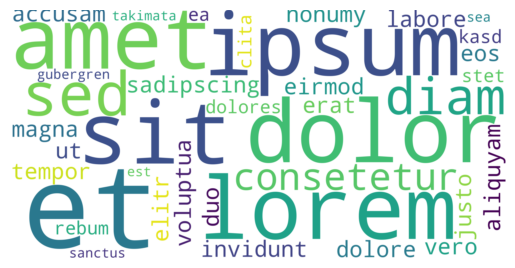

In [4]:
import matplotlib.pyplot as plt
plt.imshow(wc_rect, interpolation='bilinear')
plt.axis("off")

In [38]:
re.sub(pattern="[,:;.!]", string="this, short. string; to: test!", repl="")

'this short string to test'

In [12]:
from d3blocks import D3Blocks
import pandas as pd
import os, sys
from IPython.core.display import display, HTML

d3 = D3Blocks()
cur_cwd = os.getcwd()
# Note this must be stored in the directory as the notebook in Jupyter lab in order to render correctly
outfile = f"{cur_cwd}/outputfile.html"


/home/users/joppich/tmp/ipykernel_7497/2465388336.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
[d3blocks] >INFO> Cleaning edge_properties and config parameters..


In [3]:
hkg_df = pd.read_csv("../test1111.pd")

In [18]:
d3.d3graph(hkg_df)
d3.D3graph.set_edge_properties(directed=True, marker_end='arrow')
d3.D3graph.show(notebook=True, filepath=None, show_slider=False)
#display(HTML(html))

[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 41
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/home/users/joppich/tmp/tmp4lt16wlx/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/home/users/joppich/tmp/tmp4lt16wlx/d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Display in notebook using IPython.


)07